# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Nicolas Herrera
- Nombre de alumno 2: Lucas Carrasco

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [27]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [28]:
import pandas as pd
import numpy as np

# Cargamos los datos
data = pd.read_csv('stats_players.csv')
data.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [29]:
# marcar con 0 si es un NaN y con 1 si no lo es
labels = data['National_Position'].apply(lambda x: 0 if pd.isna(x) else 1)
labels.value_counts()

National_Position
0    16513
1     1075
Name: count, dtype: int64

Se observa que la clase negativa (con label 0) posee una cantidad de ejemplos mucho mayor que la clase positiva (con label 1). Esto indica que el dataset está desbalanceado, lo que podría ser un problema más tarde.

In [30]:
categ_cols = [
    'Name',
    'Nationality',
    'National_Position',
    'Club_Position',
    'Preffered_Foot',
    'Work_Rate',
    'Weak_foot',
    'Skill_Moves'
]

num_cols = data.columns.difference(categ_cols)

assert len(categ_cols) == 8
assert len(num_cols) == 31

In [31]:
data = data.drop(columns=['Name', 'National_Position'])
categ_cols_not_dropped = [col for col in categ_cols if col not in ['Name', 'National_Position']]

In [33]:
# import column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

categ_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoding', OneHotEncoder(sparse_output = False, handle_unknown='infrequent_if_exist'))
    ]
)

num_pipeline = Pipeline(
    [
        ('scaler', MinMaxScaler())
    ]
)

col_transformer = ColumnTransformer(
    [
        ('categ_pipeline', categ_pipeline, categ_cols_not_dropped),
        ('num_pipeline', num_pipeline, num_cols)
    ]
)

In [34]:
categ_cols_not_dropped

['Nationality',
 'Club_Position',
 'Preffered_Foot',
 'Work_Rate',
 'Weak_foot',
 'Skill_Moves']

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=19, stratify=labels)

pipeline_xgboost = Pipeline(
    [
        ('preprocessor', col_transformer),
        ('classifier', XGBClassifier())
    ]
)

pipeline_lightgbm = Pipeline(
    [
        ('preprocessor', col_transformer),
        ('classifier', LGBMClassifier())
    ]
)

In [36]:
pipeline_xgboost.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categ_pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent')),
                                                                  ('one_hot_...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

In [37]:
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 752, number of negative: 11559
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2648
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 146
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061084 -> initscore=-2.732483
[LightGBM] [Info] Start training from score -2.732483


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categ_pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent')),
                                                                  ('one_hot_...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [38]:
# Calculamos a mano la accuracy, precision, recall de la clase 1
preds_xgboost = pipeline_xgboost.predict(X_test)
preds_lightgbm = pipeline_lightgbm.predict(X_test)

def calculate_metrics(preds, y_test):
    true_positive = ((preds == 1) & (y_test == 1)).sum()
    false_positive = ((preds == 1) & (y_test == 0)).sum()
    false_negative = ((preds == 0) & (y_test == 1)).sum()
    true_negative = ((preds == 0) & (y_test == 0)).sum()

    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)

    return accuracy, precision, recall

accuracy_xgboost, precision_xgboost, recall_xgboost = calculate_metrics(preds_xgboost, y_test)
accuracy_lightgbm, precision_lightgbm, recall_lightgbm = calculate_metrics(preds_lightgbm, y_test)

print(f'XGBoost: Accuracy: {accuracy_xgboost}, Precision: {precision_xgboost}, Recall: {recall_xgboost}')
print(f'LightGBM: Accuracy: {accuracy_lightgbm}, Precision: {precision_lightgbm}, Recall: {recall_lightgbm}')

XGBoost: Accuracy: 0.9476975554292212, Precision: 0.6459627329192547, Recall: 0.3219814241486068
LightGBM: Accuracy: 0.9514875876444949, Precision: 0.7375886524822695, Recall: 0.3219814241486068


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds_xgboost))

print(classification_report(y_test, preds_lightgbm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.65      0.32      0.43       323

    accuracy                           0.95      5277
   macro avg       0.80      0.66      0.70      5277
weighted avg       0.94      0.95      0.94      5277

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.74      0.32      0.45       323

    accuracy                           0.95      5277
   macro avg       0.85      0.66      0.71      5277
weighted avg       0.94      0.95      0.94      5277



## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [40]:
data['Club_Position'].value_counts().head()

Club_Position
Sub    7492
Res    3146
RCB     633
GK      632
LCB     631
Name: count, dtype: int64

In [41]:
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
listed_positions = ataque + central_ataque + central + central_defensa + defensa + arquero
posible_positions = data['Club_Position'].unique()
positions_not_listed = [pos for pos in posible_positions if pos not in listed_positions]

In [42]:
data_clean_positions = data.copy()
data_clean_positions.dropna(subset=['Club_Position'], inplace=True)
for pos in positions_not_listed:
    data_clean_positions = data_clean_positions[data_clean_positions['Club_Position'] != pos]
data_clean_positions['Club_Position'].unique()

['LW', 'RW', 'ST', 'GK', 'CAM', ..., 'CB', 'CM', 'RWB', 'LWB', 'CF']
Length: 15
Categories (29, object): ['CAM', 'CB', 'CDM', 'CF', ..., 'RWB', 'Res', 'ST', 'Sub']

In [43]:
dict_position = {
    'ataque': ataque,
    'central_ataque': central_ataque,
    'central': central,
    'central_defensa': central_defensa,
    'defensa': defensa,
    'arquero': arquero,
    'other': positions_not_listed
}

In [44]:
type_of_position = data_clean_positions['Club_Position'].apply(lambda x: [key for key, value in dict_position.items() if x in value][0])
type_of_position.value_counts()

Club_Position
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [45]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os
import numpy as np
import random

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"
np.random.seed(42)
random.seed(42)

# es necesario instalar las librerias:
# pip install xgboost lightgbm catboost
models_to_compare = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']

data_pycaret = data.copy()
data_pycaret['label'] = labels

#Continuar código aquí
clf = setup(data_pycaret, target='label', session_id=42, n_jobs=1)

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 38)"
4,Transformed data shape,"(17588, 54)"
5,Transformed train set shape,"(12311, 54)"
6,Transformed test set shape,"(5277, 54)"
7,Numeric features,31
8,Categorical features,6
9,Rows with missing values,0.0%


In [46]:
best_model = compare_models(include=models_to_compare, sort='Prec.')
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9434,0.9418,0.1196,0.7198,0.2023,0.1887,0.2746,0.8450
rf,Random Forest Classifier,0.9464,0.9431,0.2155,0.7094,0.3277,0.3081,0.3698,1.6250
catboost,CatBoost Classifier,0.9504,0.9576,0.3965,0.6622,0.4919,0.4678,0.4868,8.0410
lightgbm,Light Gradient Boosting Machine,0.9491,0.9587,0.4164,0.6306,0.4980,0.4725,0.4856,0.3620
xgboost,Extreme Gradient Boosting,0.9495,0.9565,0.4417,0.6239,0.5145,0.4888,0.4983,0.4280
dt,Decision Tree Classifier,0.9294,0.7057,0.4509,0.4285,0.4376,0.4001,0.4012,0.2740


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

Dadas las métricas que se desean priorizar, se obtiene que le **ExtraTreesClassifier** es el mejor, ya que este obtiene la mejor precision y un buen tiempo. En particular cabe destacar que después de correr varias veces compare_models, los tiempos varian, y el ranking va cambiando mucho entre los modelos, por lo que se puede esperar que no hay uno con una clara superioridad en tiempo, y su tiempo de predicción podría variar mucho dependiendo de la corrida.

In [47]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- **Matriz de confusión**: La tasa de verdaderos negativos es muchisimo más alta (4929 TN, 56 TP). Esto es esperable considerando que la clase negativa posee muchas más instancias en el set de datos que usamos para entrenar, ya que con clases desbalanceadas los modelos tienden a predecir la clase mayoritaria. Este comportamiento se repara un poco al elegir el modelo que posea la mejor precision, ya que esto nos permitira reducir la cantidad de falsos positivos, y así **mejorar la tasa de verdaderos positivos**.
- Threshold: Al revisar las curvas creadas a partir del modelo, se observa que la mejor precision se obtiene para un threshold de 0.6, distinto al 0.5 que suele ser el default. En particular para un valor un poco mayor a 0.6 en el threshold, se obtendría una precision de 1, sin embargo, las métricas f1 y recall bajarían muy fuertemente por debajo del 0.2, y se mantendrían muy cercanas al 0. Considerando esto, se puede jugar con el precision con valores entre 0.25 y 0.6, ya que en ese punto empiezan a disminuir las otras métricas.
- La variable más importante a la hora de tomar la decisión de la clase es de lejos **Nationality**. Esto tiene mucho sentido considerando que la variable objetivo corresponde a si el jugador es seleccionado nacional o no, ya que es en general será mucho más difícil formar parte de la selección si el país tiene jugadores de mucha calidad, y viceversa. Luego el resto de las variables más importantes parecen estar relacionadas a las habilidades de los jugadores en la cancha, lo que es importante para seleccionar o no a un jugador para la selección nacional.

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [105]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=19, stratify=labels)

xgb = XGBClassifier(enable_categorical=True)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

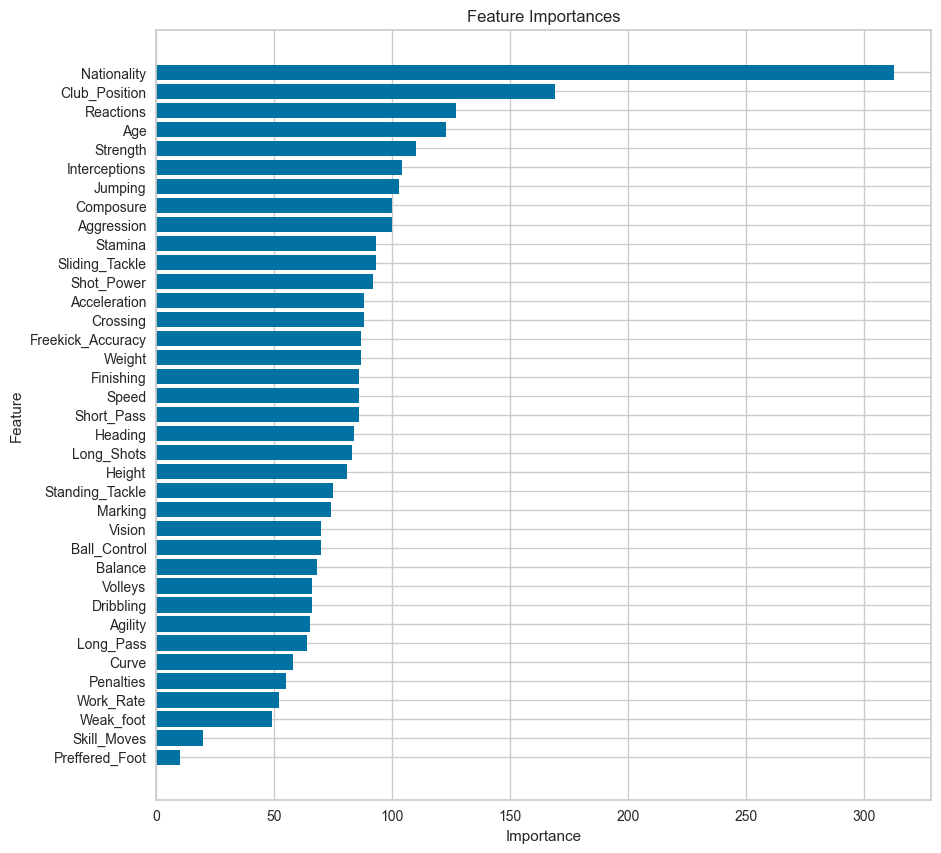

In [113]:
import matplotlib.pyplot as plt

def get_feature_importances(model, feature_names):
    importances = list(model.get_booster().get_score(importance_type='weight').values())
    features = feature_names
    features_and_importances = list(zip(features, importances))
    features_and_importances.sort(key=lambda x: x[1])
    features_ordered = [x[0] for x in features_and_importances]
    importances = [x[1] for x in features_and_importances]

    return features_ordered, importances

features_ordered, importances = get_feature_importances(xgb, data.columns)

plt.figure(figsize=(10, 10))
plt.barh(features_ordered, importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [115]:
N_features = 1

accuracies = []
precisions = []
recalls = []
number_of_features = []

features_ordered, importances = get_feature_importances(xgb, data.columns)

data_feature_extraction = data.copy()

while data_feature_extraction.shape[1] >= N_features:
    number_of_features.append(data_feature_extraction.shape[1])
    print(f'Number of features: {data_feature_extraction.shape[1]}')
    
    X_train, X_test, y_train, y_test = train_test_split(data_feature_extraction, labels, test_size=0.3, random_state=19, stratify=labels)
    
    tmp_xgb = XGBClassifier(enable_categorical=True)
    tmp_xgb.fit(X_train, y_train)
    
    # Evaluamos el modelo
    preds = tmp_xgb.predict(X_test)
    accuracy, precision, recall = calculate_metrics(preds, y_test)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')
    
    data_feature_extraction.drop(columns=[features_ordered[0]], inplace=True)
    features_removed = features_ordered[0]
    features_ordered = features_ordered[1:]
    print('')
    print(f'Feature removed: {features_removed}')

Number of features: 37
Accuracy: 0.9550881182490051, Precision: 0.6990740740740741, Recall: 0.4674922600619195

Feature removed: Preffered_Foot
Number of features: 36
Accuracy: 0.9524350956983134, Precision: 0.6621621621621622, Recall: 0.4551083591331269

Feature removed: Skill_Moves
Number of features: 35
Accuracy: 0.9547091150274777, Precision: 0.6842105263157895, Recall: 0.48297213622291024

Feature removed: Weak_foot
Number of features: 34
Accuracy: 0.9537616069736593, Precision: 0.680365296803653, Recall: 0.4613003095975232

Feature removed: Work_Rate
Number of features: 33
Accuracy: 0.9533826037521319, Precision: 0.6681222707423581, Recall: 0.47368421052631576

Feature removed: Penalties
Number of features: 32
Accuracy: 0.9543301118059504, Precision: 0.6814159292035398, Recall: 0.47678018575851394

Feature removed: Curve
Number of features: 31
Accuracy: 0.9548986166382414, Precision: 0.6940639269406392, Recall: 0.47058823529411764

Feature removed: Long_Pass
Number of features: 3

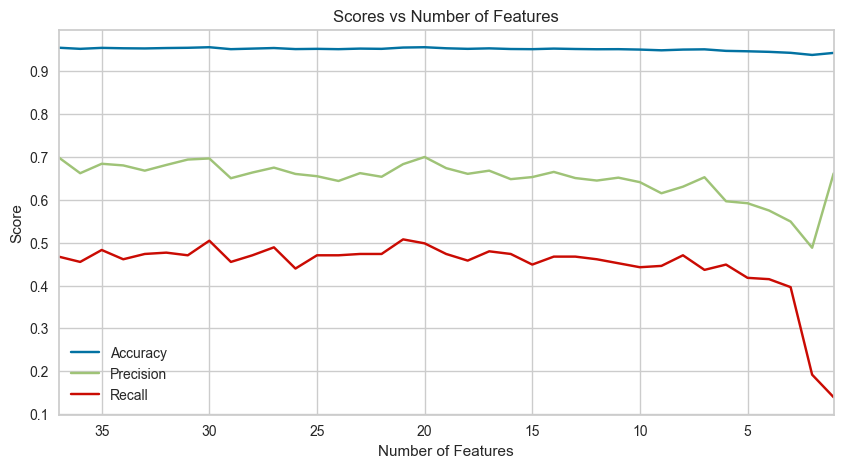

In [120]:
# plot results
fig = plt.figure(figsize=(10, 5))
plt.plot(number_of_features, accuracies, label='Accuracy')
plt.plot(number_of_features, precisions, label='Precision')
plt.plot(number_of_features, recalls, label='Recall')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.legend()
plt.xlim(max(number_of_features), min(number_of_features))
plt.title('Scores vs Number of Features')
plt.show()

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [150]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=19, stratify=labels)
xgb = XGBClassifier(enable_categorical=True)
xgb.fit(X_train, y_train)

calibrated = CalibratedClassifierCV(xgb, method='isotonic', cv=3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)

estimator = cross_validate(
    calibrated, 
    X_test, 
    y_test, 
    cv=cv, 
    scoring='precision', 
    n_jobs=-1, 
    return_estimator=True
)

Brier score loss before calibration: 0.03620679688678315
Brier score loss after calibration: 0.015040184248884978


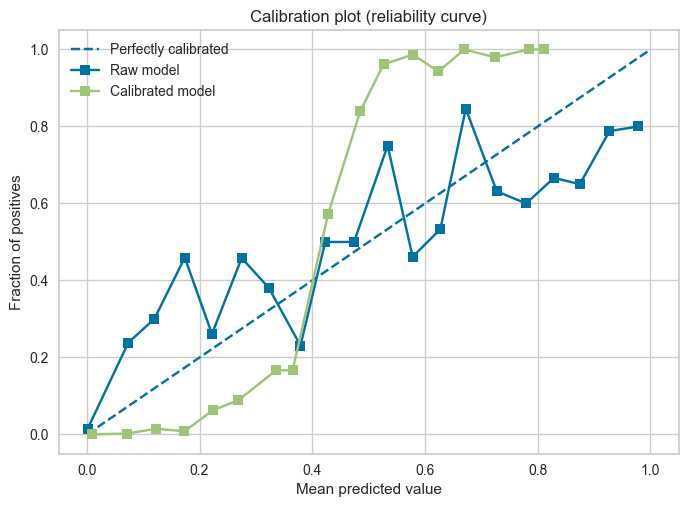

In [151]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

# Graficamos el primer modelo raw
prob_pos = xgb.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=20)
brier_before = brier_score_loss(y_test, prob_pos)
ax.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ('Raw model'))

# Graficamos el modelo calibrado
prob_pos = estimator['estimator'][0].predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=20)
brier_after = brier_score_loss(y_test, prob_pos)
ax.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ('Calibrated model'))

ax.legend()
print(f'Brier score loss before calibration: {brier_before}')
print(f'Brier score loss after calibration: {brier_after}')
plt.show()
